# 0. Understand the Problem Statement
## Objective: Basic Exploratory Analysis of Supermarket Sales Dataset

### Key Goals:
### - Identify sales, profit, and discount trends.
### - Highlight top-performing products and regions.
### - Detect basic anomalies (if any).

# 1. Data Collection & Loading


### 1.1 Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load the Dataset

In [3]:
df = pd.read_csv("Sample Supermarket Dataset.csv")
# len(df)

# 2. Data Inspection & Structure Check

### 2.1 Basic Data Inspection

In [4]:
print(df.info())  # Check column types and missing values
print(df.shape)   # Dimensions of the dataset
print(df.head())  # Preview first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None
(9994, 13)
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Cla

### 2.2 Check for Missing Data

In [5]:
# Check missing values
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Drop duplicates if any exist
df.drop_duplicates(inplace=True)

len(df)


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
Number of duplicate rows: 17


9977

### 2.3 Summary Statistics

In [12]:
df.describe() # Summary statistics of numerical columns

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# 3. Exploratory Data Analysis (EDA)

### 3.1 Top Selling Products

In [7]:
top_selling = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
top_selling.head(10)


Sub-Category
Phones         330007.0540
Chairs         327777.7610
Storage        223843.6080
Tables         206965.5320
Binders        203409.1690
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

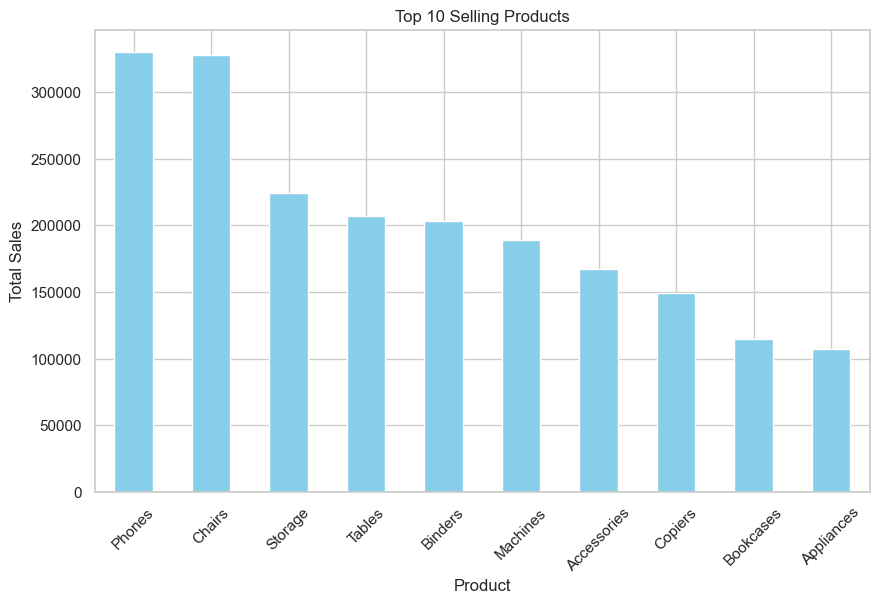

In [8]:
# Set plot style
sns.set(style="whitegrid")

# Top-Selling Products (Bar Chart)
top_selling = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_selling.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### 3.2  Profit Trends (Top Profitable Products)

In [9]:
# Group by Sub-Category and sum Profit
top_profitable = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

# Display the top 10 most profitable products
print(top_profitable.head(10))


Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          33944.2395
Binders        30228.0003
Chairs         26567.1278
Storage        21278.8264
Appliances     18138.0054
Furnishings    13052.7230
Envelopes       6964.1767
Name: Profit, dtype: float64


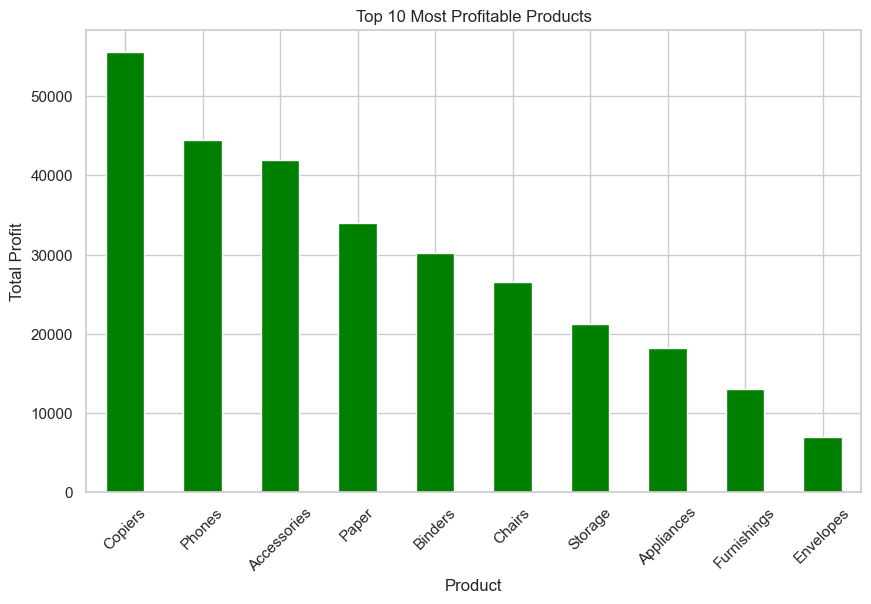

In [10]:
# Profit Trends (Bar Chart)
top_profitable = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_profitable.plot(kind='bar', color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

### 3.3 Impact of Discounts on Profit

In [12]:
# Checking the correlation between Discount and Profit
correlation = df[['Discount', 'Profit']].corr()
print(correlation)

          Discount    Profit
Discount  1.000000 -0.219662
Profit   -0.219662  1.000000


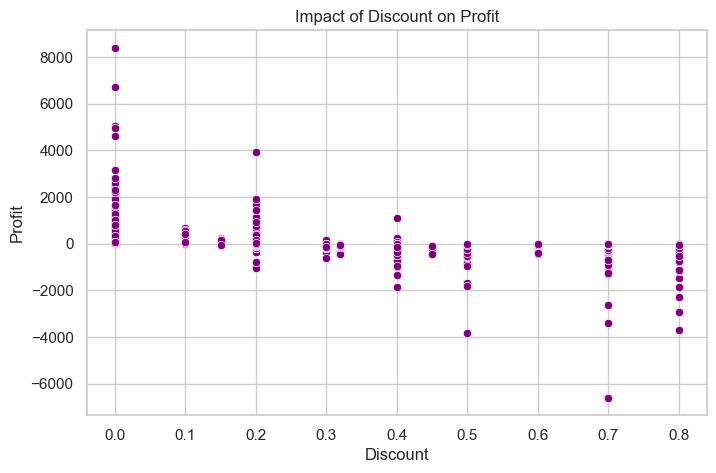

In [13]:
# Impact of Discounts on Profit (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount', y='Profit', data=df, color='purple')
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

### 3.4 Regional Sales Distribution

In [15]:
# Group by Region and sum Sales and Profit
regional_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Display regional sales performance
print(regional_sales)

               Sales       Profit
Region                           
West     725255.6365  108329.8079
East     678435.1960   91506.3092
Central  500782.8528   39655.8752
South    391721.9050   46749.4303


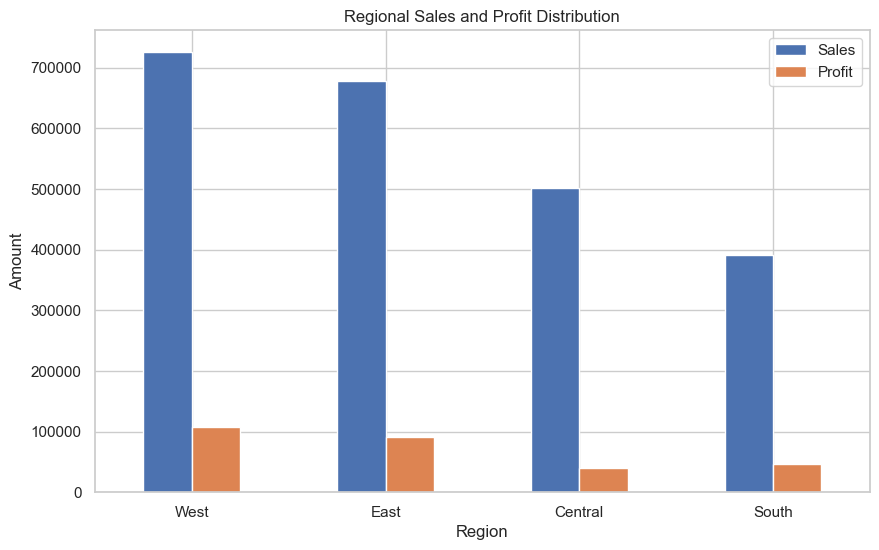

In [16]:
# Regional Sales Distribution (Bar Chart)
regional_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
regional_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Regional Sales and Profit Distribution')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

### 3.5 Sales by Customer Segment

In [17]:
# Group by Segment and sum Sales and Profit
segment_sales = df.groupby('Segment')[['Sales', 'Profit']].sum()

# Display sales by segment
print(segment_sales)


                    Sales       Profit
Segment                               
Consumer     1.160833e+06  134007.4413
Corporate    7.060701e+05   91954.9798
Home Office  4.292927e+05   60279.0015


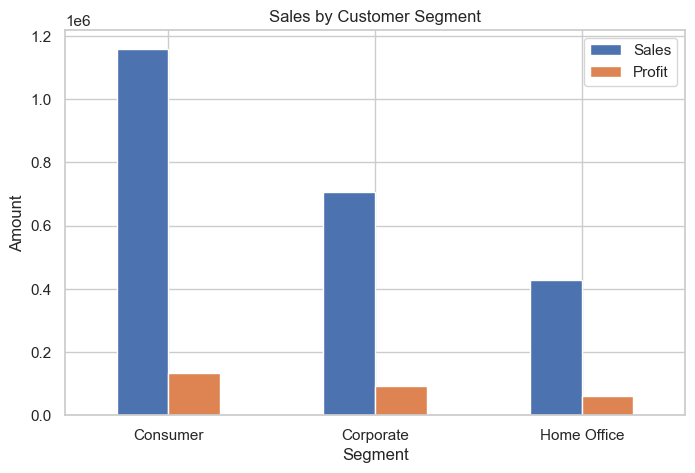

In [18]:
# Sales by Customer Segment (Bar Chart)
segment_sales = df.groupby('Segment')[['Sales', 'Profit']].sum()
segment_sales.plot(kind='bar', figsize=(8, 5))
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

# 4. Detecting Basic Anomalies

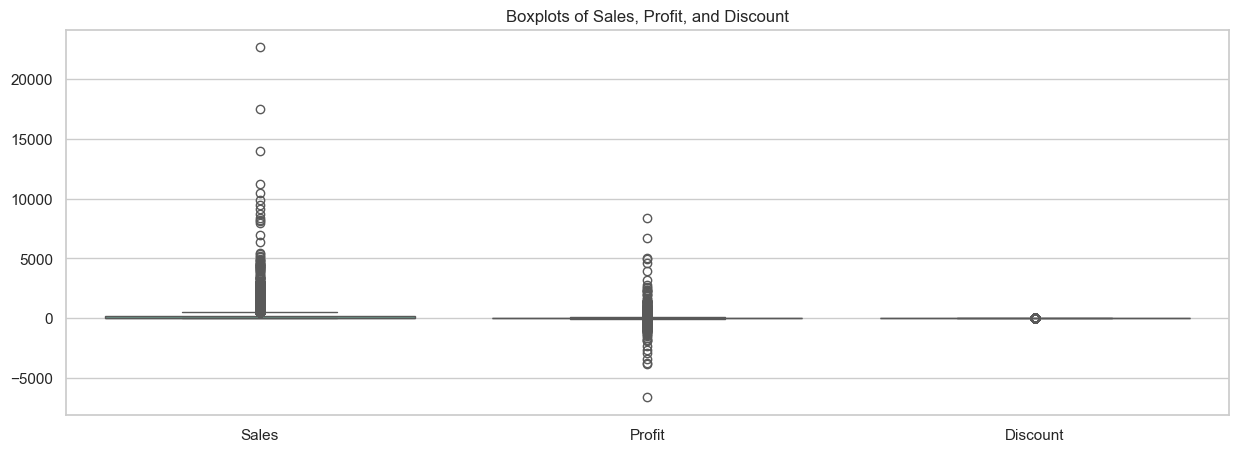

In [19]:
# 7. Boxplots of Sales, Profit, and Discount Potential Anomalies
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['Sales', 'Profit', 'Discount']], palette='Set2')
plt.title('Boxplots of Sales, Profit, and Discount')
plt.show()


### 4.3 Detecting Anomalies

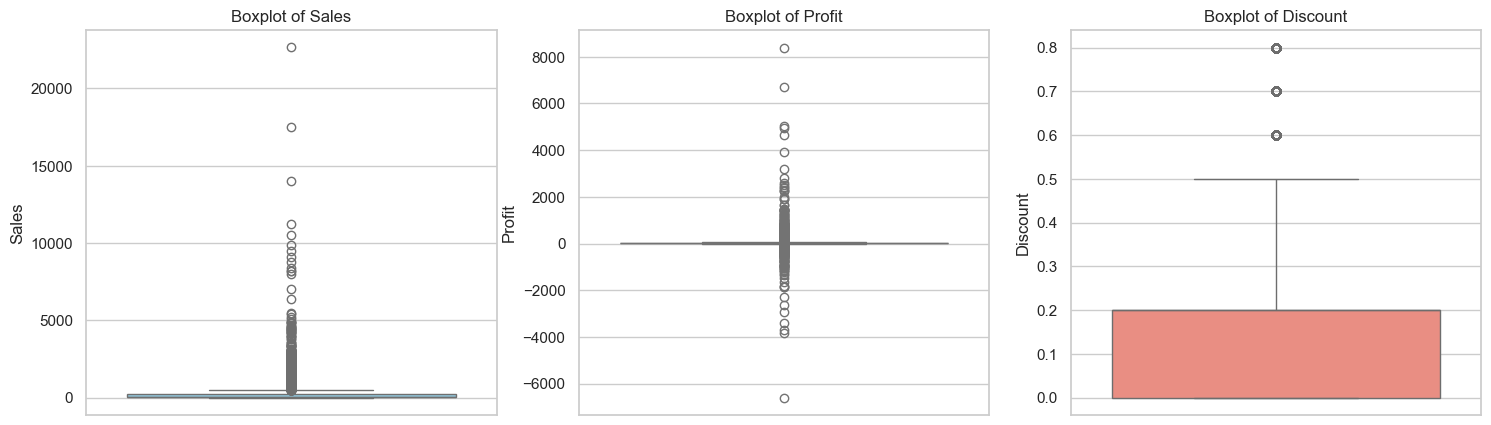

In [31]:
# Set style for plots
sns.set(style="whitegrid")

# Create boxplots for numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sales Boxplot
sns.boxplot(y=df["Sales"], ax=axes[0], color="skyblue")
axes[0].set_title("Boxplot of Sales")

# Profit Boxplot
sns.boxplot(y=df["Profit"], ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Profit")

# Discount Boxplot
sns.boxplot(y=df["Discount"], ax=axes[2], color="salmon")
axes[2].set_title("Boxplot of Discount")

plt.show()